In [ ]:
# manual anno for sub-types?

In [8]:
library(Seurat)
library(dplyr)

In [9]:
# get list of samples
stages = c(rep('stage23', 2), rep(c('stage28', 'stage32'), each = 3))
samples = c('sample3', 'sample10', 'sample5', 'sample10', 'sample11',
           'sample5', 'sample10', 'sample12')

In [10]:
# get counts and mtd
cls_list = c('erythroid', 'endocardial', 'vCM_left', 'precursor', 'erythroid', 'vCM_right', 
             'vCM_CS', 'aCM', 'myoIntFibro', 'SMC', 'valve_endothelial', 'AVN_pacemaker', 'myoIntFibro', 
             'AdvFibro', 'vCM_right', 'endocardial', 'SMC', 'vCM_left', 'endocardial', 'epicardial', 
             'erythroid', 'pericyte', 'SAN_pacemaker', 'Epi-derived', 'SAN_pacemaker', 'Epi-derived', 
             'vCM_right', 'Epi-derived', 'epicardial', 'non-WBC', 'WBC', 'neural_crest', 'neural_crest')

length(unique(cls_list))

[1] 19

In [11]:
# gene lists
m1 = read.delim('~/septation/markers/Bayraktar_marker_genes.txt', sep = '\t')
m1[1:2,]

Compartment    Subtype              Cluster                  
1 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesLeft 
2 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesRight
  Gene                                                                                                
1 TNNT2,ACTN2,LDB3,CSRP3,SMPX,KCNMB2,PCDH7,RYR3,PANCR,MBP,NAV3,PITX2,NPTN,NPPA,MYL7,MYL4,MYH6,PPKAG2  
2 TNNT2,ACTN2,LDB3,CSRP3,SMPX,NTM,ROR1,KIF26B,PLC1,ANGPT1,BRINP3,BMP10,NPTN,NPPA,MYL7,MYL4,MYH6,PPKAG2
  Comments                                                
1 Genes NPPA,MYL7,MYL4,MYH6,PPKAG2 are from Kanemaru et al
2 Genes NPPA,MYL7,MYL4,MYH6,PPKAG2 are from Kanemaru et al

In [40]:
ctypes = m1$Cluster
top_markers = c()

for(ii in 1:length(ctypes)){
    temp = data.frame(compartment = m1$Compartment[ii], 
                      subtype = m1$Subtype[ii], cluster = m1$Cluster[ii],
                      gene = unique(unlist(stringr::str_split(m1$Gene[ii], ','))))
    top_markers = rbind(top_markers, temp)
}
top_markers[1:3,]

compartment    subtype              cluster                  gene 
1 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesLeft TNNT2
2 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesLeft ACTN2
3 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesLeft LDB3

In [12]:
tab1 = read.delim('chicken_manual_anno1.csv', sep = ',')
tab1$consensus_type = tab1$anno1
tab1[1:2,]

stage           cluster anno1       anno2 confident consensus_type
1 stage23_sample3 0       endocardial       yes       endocardial   
2 stage23_sample3 1       erythroid         yes       erythroid

In [8]:
tab1[tab1$anno2=='SMC',]

stage            cluster anno1       anno2 confident consensus_type
109 stage32_sample5   3      endothelial SMC             endothelial   
118 stage32_sample5  12      endothelial SMC   no        endothelial   
119 stage32_sample5  13      endothelial SMC             endothelial   
139 stage32_sample10 13      endothelial SMC   yes       endothelial   
151 stage32_sample12  7      endothelial SMC   no        endothelial   
159 stage32_sample12 15      endothelial SMC   yes       endothelial

In [13]:
# Kanemaru cell types?
newdf = c()

for(id1 in 1:length(samples)){
    currstage1 = stages[id1]
    currsmp1 = samples[id1]
    temp = read.delim(paste0('annotations/', currstage1, '_', currsmp1, '_Kanemaru_celltypes.csv'),
                sep = ',')
    newdf = rbind(newdf, temp)
}
newdf[1,]

barcode                            class                               
1 stage23_sample3_AAACCCAAGTAACAGT-1 endothelial cell of lymphatic vessel
  class_score class_enrichment celltype   celltype_score celltype_enrichment
1 2.821252    1.490557         unassigned 3.301225       1                  
  final_celltype
1 unassigned

In [14]:
sc1 = readRDS('chicken_integrated_ssSTACAS_v2.rds')
sc1

An object of class Seurat 
19007 features across 50547 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [15]:
# Kanemaru cell types
sc1$class = newdf$class[match(rownames(sc1@meta.data), newdf$barcode)]
sc1$subclass = newdf$celltype[match(rownames(sc1@meta.data), newdf$barcode)]

# manual anno
for(id3 in 1:length(samples)){
    
    # add simple cell anno
    tab2 = tab1[which(tab1$stage == paste0(stages[id3], '_', samples[id3])),]
    sc1$anno2 = tab2$anno2[match(sc1$old_clusters, tab2$cluster)]
     
}

In [16]:
sc1@meta.data[1:3,]

orig.ident nCount_RNA nFeature_RNA species
stage23_sample3_AAACCCAAGTAACAGT-1 stage23    5044       2506         chicken
stage23_sample3_AAACCCACAACAGAGC-1 stage23    7014       2721         chicken
stage23_sample3_AAACCCACATCGATAC-1 stage23    1350       1009         chicken
                                   dataset         consensus_type
stage23_sample3_AAACCCAAGTAACAGT-1 stage23_sample3 endocardial   
stage23_sample3_AAACCCACAACAGAGC-1 stage23_sample3 cardiomyocyte 
stage23_sample3_AAACCCACATCGATAC-1 stage23_sample3 erythroid     
                                   integrated_snn_res.1 seurat_clusters
stage23_sample3_AAACCCAAGTAACAGT-1 15                   15             
stage23_sample3_AAACCCACAACAGAGC-1 17                   17             
stage23_sample3_AAACCCACATCGATAC-1 4                    4              
                                   old_clusters
stage23_sample3_AAACCCAAGTAACAGT-1 0           
stage23_sample3_AAACCCACAACAGAGC-1 3           
stage23_sample3_AAACCCACATCGATAC-1 1           
                                   class                               
stage23_sample3_AAACCCAAGTAACAGT-1 endothelial cell of lymphatic vessel
stage23_sample3_AAACCCACAACAGAGC-1 regular ventricular cardiac myocyte 
stage23_sample3_AAACCCACATCGATAC-1 regular ventricular cardiac myocyte 
                                   subclass      anno2      
stage23_sample3_AAACCCAAGTAACAGT-1 unassigned               
stage23_sample3_AAACCCACAACAGAGC-1 vCM3_stressed ventricular
stage23_sample3_AAACCCACATCGATAC-1 vCM4

In [13]:
table(sc1$subclass[sc1$seurat_clusters==23])
cls_list


           aCM4       CD4+T_Th2     CD8+T_cytox   EC10_CMC-like         EC5_art 
              5               1              46               1               1 
EC7_endocardial     EC9_FB-like             FB2   FB4_activated             FB6 
              7               6             170              13              88 
            gdT       NC1_glial  NC2_glial_NGF+        PC1_vent       PC2_atria 
              6               1              44               2               2 
     SAN_P_cell      unassigned    unclassified            vCM1            vCM2 
              8              15               6              11             121 
  vCM3_stressed            vCM4            vCM5 
             39              95              26 

[1] "erythroid"         "endocardial"       "vCM_left"         
 [4] "precursor"         "erythroid"         "vCM_right"        
 [7] "vCM_CS"            "aCM"               "myoIntFibro"      
[10] "SMC"               "valve_endothelial" "AVN_pacemaker"    
[13] "myoIntFibro"       "AdvFibro"          "vCM_right"        
[16] "endocardial"       "SMC"               "vCM_left"         
[19] "endocardial"       "epicardial"        "erythroid"        
[22] "pericyte"          "SAN_pacemaker"     "Epi-derived"      
[25] "SAN_pacemaker"     "Epi-derived"       "vCM_right"        
[28] "Epi-derived"       "epicardial"        "non-WBC"          
[31] "WBC"               "neural_crest"      "neural_crest"

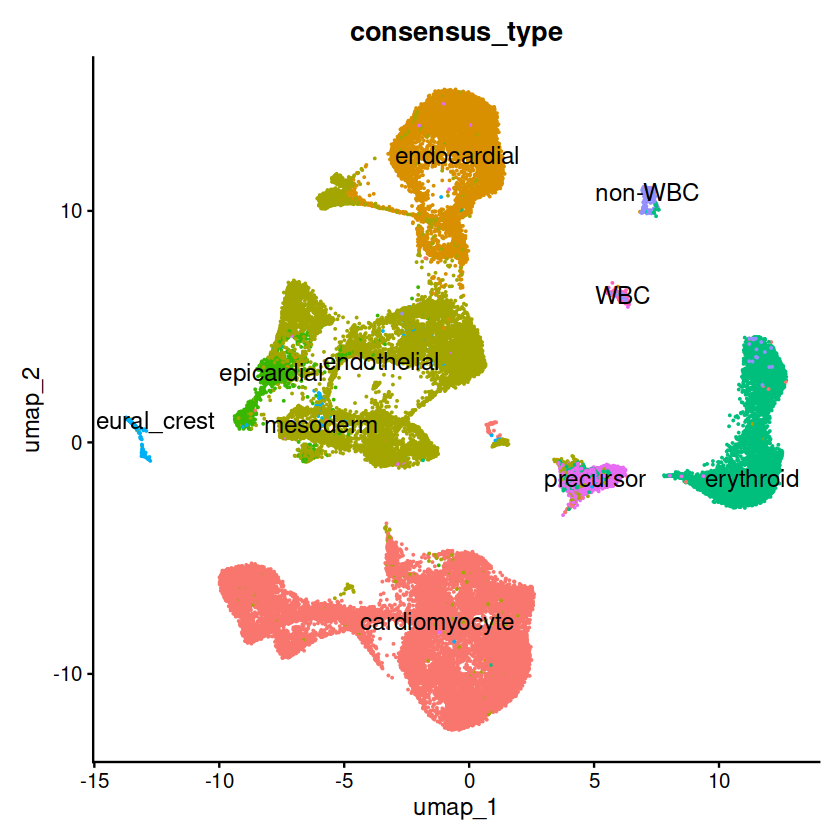

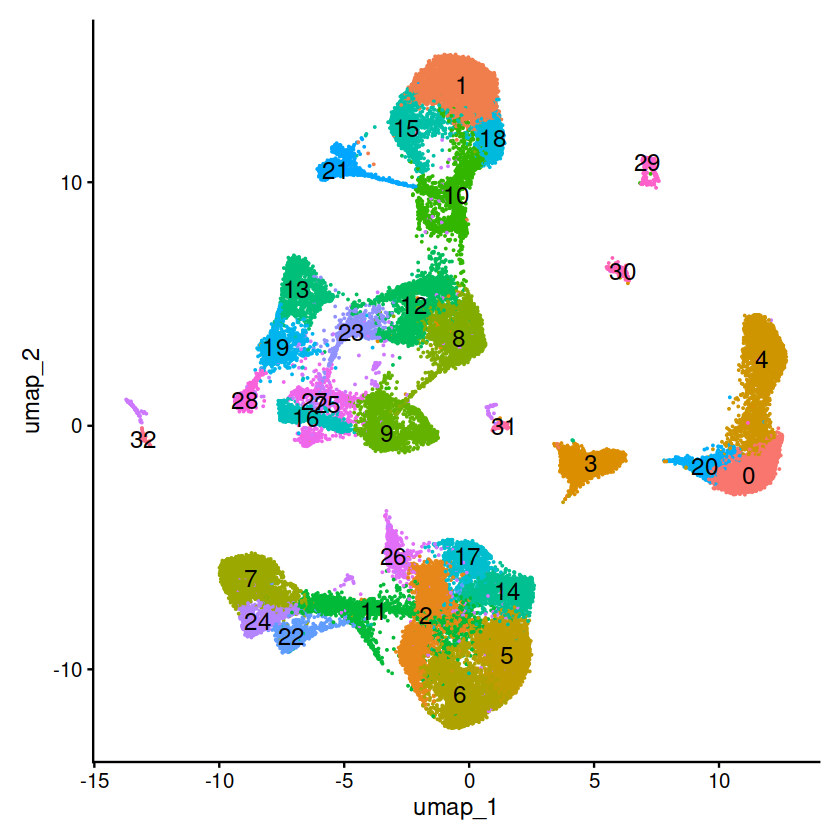

In [14]:
DimPlot(sc1, reduction = 'umap', group.by = 'consensus_type', label = T, label.size = 5) + NoLegend()
DimPlot(sc1, reduction = 'umap', label = T, label.size = 5) + NoLegend()

In [17]:
exp_mat = LayerData(sc1, assay = 'RNA', layer = 'counts')

In [18]:
cls_list = c(7,24,22, 11,2,26, 17,14,6,5)
# cls_list = c(1,10,15,18)
# cls_list = c(8,12,13,23, 9,16,25,27, 21)

In [19]:
# for subset of data
ids = which(sc1$seurat_clusters %in% cls_list)
sce = CreateSeuratObject(counts = exp_mat[,ids],
                        meta.data = sc1@meta.data[ids,])
sce <- NormalizeData(sce)

Normalizing layer: counts



In [20]:
# recluster data

sce <- FindVariableFeatures(sce, selection.method = "vst")
sce <- ScaleData(sce, features = rownames(sce), verbose = FALSE)
sce <- RunPCA(sce, features = VariableFeatures(sce), verbose =  FALSE)

sce <- FindNeighbors(sce, dims = 1:20, k = 30)
sce <- FindClusters(object = sce, resolution = 0.5, verbose = FALSE)
sce <- RunUMAP(object = sce, dims = 1:20, verbose = FALSE)

Idents(sce) <- "seurat_clusters"

Finding variable features for layer counts

Computing nearest neighbor graph

Computing SNN

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


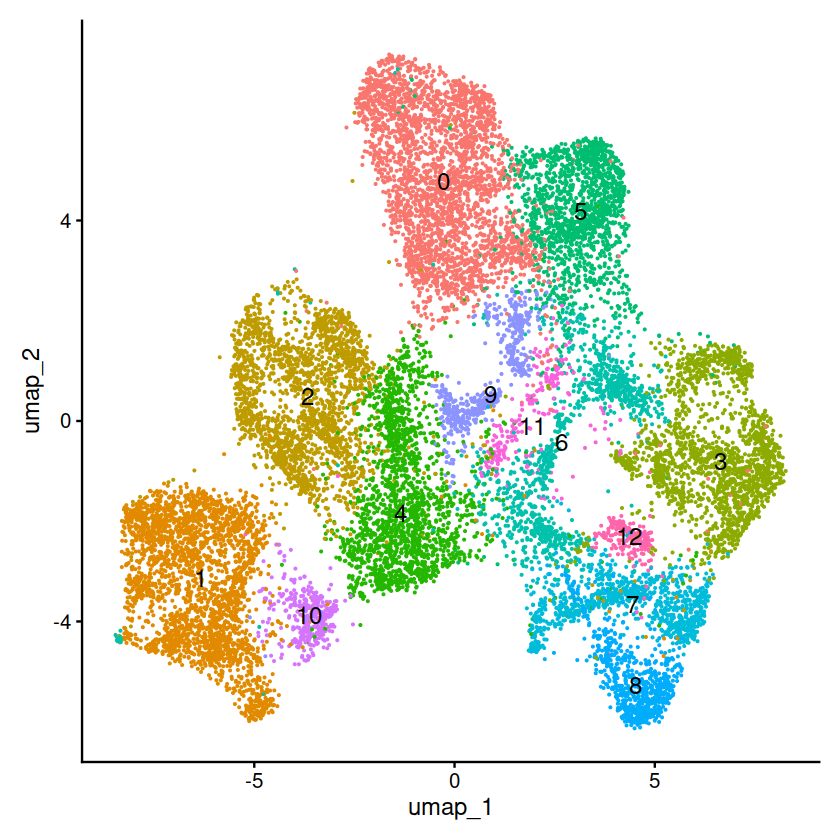

In [21]:
DimPlot(sce, reduction = 'umap', label = T, label.size = 5) + NoLegend()

In [22]:
# sce@meta.data %>% group_by(seurat_clusters, anno2) %>% reframe(count = n())
head(sce@meta.data %>% group_by(seurat_clusters, subclass) %>% reframe(count = n()), n = 10)

seurat_clusters subclass      count
1  0               CD8+T_cytox      1 
2  0               aCM4             8 
3  0               unclassified     1 
4  0               vCM1           479 
5  0               vCM2          1402 
6  0               vCM3_stressed  101 
7  0               vCM4          1002 
8  0               vCM5             1 
9  0               NA               5 
10 1               CD8+T_cytox      1

In [66]:
# top markers
currcls = 9
markers <- FindMarkers(object = sce, ident.1 = currcls, only.pos = T)
head(markers)
rownames(markers)[1:50]

match('MYH7', rownames(markers))

p_val         avg_log2FC pct.1 pct.2 p_val_adj    
NELL1     0.000000e+00 4.285902   0.407 0.037  0.000000e+00
SYK       0.000000e+00 5.243834   0.241 0.010  0.000000e+00
PCDH15   2.526726e-297 4.572801   0.586 0.107 4.297202e-293
SNTG1    9.219127e-293 4.033018   0.433 0.055 1.567897e-288
KCNQ5    1.020189e-261 2.983370   0.690 0.169 1.735036e-257
IL1RAPL1 2.490746e-221 4.364338   0.345 0.045 4.236012e-217

[1] "NELL1"              "SYK"                "PCDH15"            
 [4] "SNTG1"              "KCNQ5"              "IL1RAPL1"          
 [7] "NPAS3"              "DIRAS2"             "COLQ"              
[10] "FGF13"              "COL25A1"            "CADM1"             
[13] "DCX"                "SIDT1"              "EYA4"              
[16] "RCAN2"              "SLC16A12"           "FGF9"              
[19] "GABRG3"             "TLX1"               "UNC5C"             
[22] "PIGG"               "STEAP4"             "CAMKK1"            
[25] "DLG2"               "PLB1"               "WDR17"             
[28] "ATRNL1"             "ADAMTSL3"           "CALCRL"            
[31] "ENSGALG00010005008" "BMP5"               "TBX2"              
[34] "IRAG1"              "CDH7"               "PDE10A"            
[37] "SAXO2"              "PDZRN4"             "NRXN1"             
[40] "SH3BGRL"            "EML5"               "LDB3"              
[43] "ENSGALG00010007936" "GDPD5"              "HOXA3"             
[46] "CMSS1"              "DUSP16"             "MAF"               
[49] "MAP4K4"             "SYNPO2"

[1] NA

In [54]:
options(warn = -1)

ctypes = unique(top_markers$cluster)
df2 = data.frame(celltype = ctypes, num_markers = NA, avg_rank = NA,
                min_rank = NA, best_gene = NA, genes = NA)

for(ii in 1:length(ctypes)){
    gset = unlist(top_markers$gene[top_markers$cluster==ctypes[ii]])
    vec2 = match(gset, rownames(markers))
    df2$num_markers[ii] = sum(!is.na(vec2))
    df2$avg_rank[ii] = round(mean(vec2, na.rm = T))
    df2$min_rank[ii] = min(vec2, na.rm = T)
    df2$best_gene[ii] = rownames(markers)[df2$min_rank[ii]]
    df2$genes[ii] = paste(rownames(markers)[sort(vec2[!is.na(vec2)])], collapse = ', ')
}

df2 %>% arrange(-(num_markers)) %>% head(., 10)

Warning message in min(vec2, na.rm = T):
“no non-missing arguments to min; returning Inf”
Warning message in min(vec2, na.rm = T):
“no non-missing arguments to min; returning Inf”
Warning message in min(vec2, na.rm = T):
“no non-missing arguments to min; returning Inf”
Warning message in min(vec2, na.rm = T):
“no non-missing arguments to min; returning Inf”
Warning message in min(vec2, na.rm = T):
“no non-missing arguments to min; returning Inf”


celltype                                   num_markers avg_rank min_rank
1  VentricularCardiomyocytesLeftCompact       3            922       23    
2  VentricularCardiomyocytesLeftTrabeculated  2           3050     1911    
3  SinoatrialNodePacemakerCells               2           2022       27    
4  VentricularConductionSystemProximal        2           1537      102    
5  AtrialCardiomyocytesLeft                   1           2834     2834    
6  AtrialCardiomyocytesRight                  1            355      355    
7  VentricularCardiomyocytesRightTrabeculated 1           4190     4190    
8  AtrialCardiomyocytesCycling                0            NaN      Inf    
9  VentricularCardiomyocytesRightCompact      0            NaN      Inf    
10 VentricularCardiomyocytesCycling           0            NaN      Inf    
11 AtrioventricularNodePackemakerCells        0            NaN      Inf    
12 VentricularConductionSystemDistal          0            NaN      Inf    
   best_gene genes             
1  HEY2      HEY2, KCNQ5, CRIM1
2  CRIM1     CRIM1, SPOCK1     
3  MYH11     MYH11, PDE1A      
4  PRDM16    PRDM16, PHACTR1   
5  MBP       MBP               
6  KIF26B    KIF26B            
7  SPOCK1    SPOCK1            
8  NA                          
9  NA                          
10 NA                          
11 NA                          
12 NA

In [ ]:
# 5,14 is v-right-trab, 2,17 is v-left-trab, 26 is v-right-trab
# 6 is VCS_distal, 7 is VCS_proximal, 22,24 is SAN-P, 11 is vCM or pacemaker